# 相関図深堀りメーカー
独断と偏見で作ったアニメや漫画などの人物相関図を使用して楽しむソフトウェア。

データの入力方法は戸塚（e1958207@gmail.com）に聞いてください。

<注意>
*   キャラクターたちの名前は全角スペース（文字コード：\u3000）なども厳密に区別されるのでデータ入力は注意してください！！
*   使用する全てのキャラクターの名前をファイルの「名前一覧」に登録してください！！
*   上手く日本語が出力しない場合は、「ランタイム」→「ランタイムを出荷設定時にリセット」をしてください。

# メイン関数

＜＜Welcome!＞＞
自分なりの人物相関図は作りましたか？
1：Yes, 2：No
1
「 千と千尋の神隠し 」の相関図を使ってグループ分けを行います
今回は 親密な 人同士のグループができます


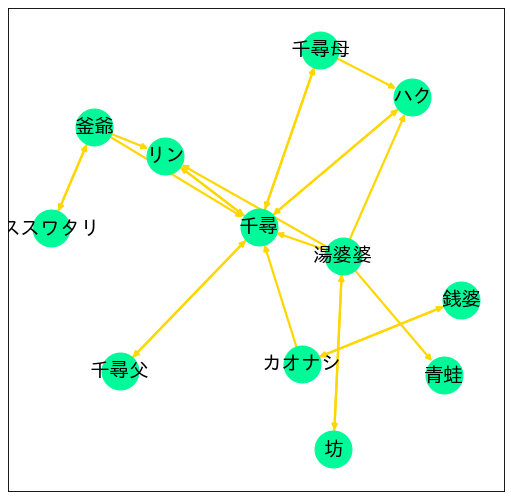


<グループ 1 >
ハク
千尋母
千尋
リン
千尋父

<グループ 2 >
湯婆婆
坊

<グループ 3 >
カオナシ
銭婆

<グループ 4 >
釜爺
ススワタリ

<グループ 5 >
青蛙

以上のように5個のグループに分けることができます

キャラクターの距離を測りますか？
1：Yes, 2：No
1
source：カオナシ
target：リン

カオナシ から リン までの辺の数は 2 です
＜つながりの経路＞
カオナシ→千尋→リン

キャラクターの距離を測りますか？
1：Yes, 2：No
２
プログラムを終了します


In [ ]:
def main():
  print("＜＜Welcome!＞＞")

  select = input("自分なりの人物相関図は作りましたか？\n1：Yes, 2：No\n")
  if select == "2": #ファイルが無かったらプログラム終了
    print("出直してこい")
    return 0

  #ファイル読み込み
  character_list = []
  character_dict = {}
  with open('spiritedAway.csv') as f: #ファイルの名前を指定
    header = next(csv.reader(f)) #ヘッダーをスキップできる
    data = csv.reader(f)
    for row in data:
      try:
        character = Character(row[0]) #アカウント作成

        #フォロー関係の読み込み
        for i in range(len(row)-1):
          if row[i+1] == "": #空データは飛ばす
            pass
          else:
            character.follow_list.append(row[i+1]) #フォローリストに追加

        character_list.append(character) #全ユーザーをリストに格納
        character_dict[character.name] = character #名前で検索できるようにする

      except IndexError: #データが何も入っていない場合の例外処理
        print("データが十分に入っていません")
        pass
  print("「", header[3] ,"」の相関図を使ってグループ分けを行います")
  print("今回は", header[2], "人同士のグループができます")

  Di_G = relationship(character_list, character_dict) #強連結成分分解
  save_character(character_list) #結果をセーブ
  while True:
    result = distance(Di_G)
    if result == None:
      break
  print("プログラムを終了します")

if __name__ == "__main__":
	main()

# ライブラリのインポート

In [ ]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 12.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=b4d9b050572ea04edd2d3142bb9686dd85585e4134c93fb8e9ca73770b67b0ef
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

japanize_matplotlib.japanize() #日本語化を実行（IPAexGothicをロード）

# キャラクター情報を格納するクラス

In [ ]:
class Character:
  def __init__(self, name):
    self.name = name #名前

    self.follow_list = [] #自分のフォローリストを作成
    self.group = -1 #グループの番号（デフォルトは-1）

# 相関図を読み取ってグループ化（強連結分解）

In [ ]:
def relationship(character_list, character_dict):
  Di_G = nx.DiGraph() #有向グラフ

  #ユーザーをノードにする
  for i in range(len(character_list)):
    character = character_list[i] #特定のユーザーを取り出す
    Di_G.add_node(character.name)

    #フォロー関係を基にユーザーのつながりを作る
    follow_list = character.follow_list
    for follow in follow_list:
      Di_G.add_edge(character.name, follow) #user_name→follwへ有向辺を張る

  #参考のために可視化
  plt.figure(figsize=(8, 8), dpi=80)
  pos = nx.spring_layout(Di_G, k=1.0)
  nx.draw_networkx(Di_G, pos=pos, with_labels=True, node_size=1100, node_color = "#00fa9a", edge_color = "#ffd700", width = 2, font_size=18, font_family='IPAexGothic')
  plt.show()

  #強連結成分分解
  groups = sorted(nx.strongly_connected_components(Di_G), key=lambda x: len(x), reverse=True) #グループの要素数の多い順にソート
  for i in range(len(groups)):
    print("\n<グループ", i+1,">") #強連結成分
    elements = list(groups[i]) #set型をリスト型に変換
    for name in elements:
      character = character_dict[name]
      character.group = i+1
      print(name)

  print("\n以上のように"+str(i+1)+"個のグループに分けることができます\n")

  return Di_G

# キャラクターの距離を計測（ダイクストラ法）

In [ ]:
def distance(G):
  select = input("キャラクターの距離を測りますか？\n1：Yes, 2：No\n")
  if select == "1":
    source = input("source：")
    target = input("target：")
    try:
      length = nx.dijkstra_path_length(G, source, target) #ダイクストラ法で距離を計測
      path = nx.dijkstra_path(G, source, target) #ダイクストラ法で経路を求める
      print()
      print(source,"から",target, "までの辺の数は",length,"です")
      print("＜つながりの経路＞")
      i = 0
      for i in range(len(path)): #結果を出力
        if i < len(path)-1:
          print(path[i]+str("→"),end="")
        else:
          print(path[i])
          print()
      return length
    except:
      print("\n距離が測れません")
      print("関係性が薄いみたい・・・\n")
      length = 0 #距離は0とする
      return length
  else:
    return None #終了するときはNoneを返す

# セーブ関数

In [ ]:
def save_character(character_list):
  with open('character_group.csv', 'w', newline='', encoding='utf_8_sig') as f:
    writer = csv.writer(f)
    if len(character_list) == 0: #登録する情報が無かったら
      pass
    else:
      header = ["name", "group"] #名前とグループを保存
      writer.writerow(header)
      #csvファイルに出力
      for character in character_list:
        writer.writerow([character.name,character.group])